In [1]:
# load training data
import pandas as pd
print 'Loading trainig data'
train_data = pd.read_csv('l_train.csv')
print "finished"

Loading trainig data
finished


In [7]:
X = train_data.iloc[:,1:32]
y = train_data['Label']

In [8]:
import numpy as np
# display each column's data type
# so we can detect inconsistencies
print "---- Data types by feature ----"
columns =  X.columns
for column in columns:
    vals = [type(val) for val in X[column].unique()]
    print 'feature: {}, types: {}'.format(column, np.unique(vals))

---- Data types by feature ----
feature: DER_mass_MMC, types: [<type 'numpy.float64'>]
feature: DER_mass_transverse_met_lep, types: [<type 'numpy.float64'>]
feature: DER_mass_vis, types: [<type 'numpy.float64'>]
feature: DER_pt_h, types: [<type 'numpy.float64'>]
feature: DER_deltaeta_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_mass_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_prodeta_jet_jet, types: [<type 'numpy.float64'>]
feature: DER_deltar_tau_lep, types: [<type 'numpy.float64'>]
feature: DER_pt_tot, types: [<type 'numpy.float64'>]
feature: DER_sum_pt, types: [<type 'numpy.float64'>]
feature: DER_pt_ratio_lep_tau, types: [<type 'numpy.float64'>]
feature: DER_met_phi_centrality, types: [<type 'numpy.float64'>]
feature: DER_lep_eta_centrality, types: [<type 'numpy.float64'>]
feature: PRI_tau_pt, types: [<type 'numpy.float64'>]
feature: PRI_tau_eta, types: [<type 'numpy.float64'>]
feature: PRI_tau_phi, types: [<type 'numpy.float64'>]
feature: PRI_lep_pt, types: [<ty

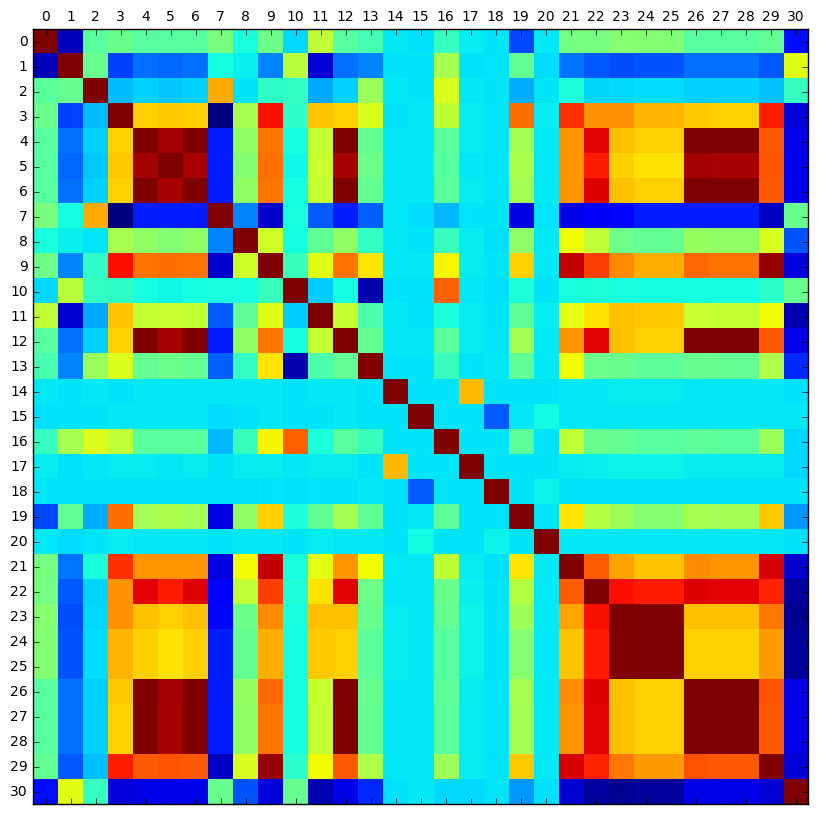

In [9]:
# first I want to see what correlations exist within features
import matplotlib.pyplot as plt

# change feature names for numbers
# so we can visualize it better
def names_to_nums(df_in):
    df = df_in.copy()
    df.columns = [i for i in range(0, len(df.columns))]
    return df
# print correlation matrix
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
X_nums = names_to_nums(X)
plot_corr(X_nums)

In [10]:
# print list of values so we can see which correspond to which index
print [(pos, val) for pos, val in enumerate(X.columns.values)]

[(0, 'DER_mass_MMC'), (1, 'DER_mass_transverse_met_lep'), (2, 'DER_mass_vis'), (3, 'DER_pt_h'), (4, 'DER_deltaeta_jet_jet'), (5, 'DER_mass_jet_jet'), (6, 'DER_prodeta_jet_jet'), (7, 'DER_deltar_tau_lep'), (8, 'DER_pt_tot'), (9, 'DER_sum_pt'), (10, 'DER_pt_ratio_lep_tau'), (11, 'DER_met_phi_centrality'), (12, 'DER_lep_eta_centrality'), (13, 'PRI_tau_pt'), (14, 'PRI_tau_eta'), (15, 'PRI_tau_phi'), (16, 'PRI_lep_pt'), (17, 'PRI_lep_eta'), (18, 'PRI_lep_phi'), (19, 'PRI_met'), (20, 'PRI_met_phi'), (21, 'PRI_met_sumet'), (22, 'PRI_jet_num'), (23, 'PRI_jet_leading_pt'), (24, 'PRI_jet_leading_eta'), (25, 'PRI_jet_leading_phi'), (26, 'PRI_jet_subleading_pt'), (27, 'PRI_jet_subleading_eta'), (28, 'PRI_jet_subleading_phi'), (29, 'PRI_jet_all_pt'), (30, 'Weight')]


In [31]:
# deal with incorrect values later

In [11]:
corr_tups = []
# make a numerical visualization of the correlations
for column in X.columns:
    corr = X.corr()[column]
    corr_dict = corr.to_dict()
    del corr_dict[column]
    max_key = max(corr_dict, key=lambda k: corr_dict[k])
    pair = (column, max_key, corr_dict[max_key])
    corr_tups.append(pair)
    print '{} with {}, value: {}'.format(column, max_key, corr_dict[max_key])

DER_mass_MMC with DER_met_phi_centrality, value: 0.358962714301
DER_mass_transverse_met_lep with Weight, value: 0.41984342625
DER_mass_vis with DER_deltar_tau_lep, value: 0.579711616621
DER_pt_h with DER_sum_pt, value: 0.832733066633
DER_deltaeta_jet_jet with DER_lep_eta_centrality, value: 0.999998385715
DER_mass_jet_jet with PRI_jet_subleading_pt, value: 0.94765180638
DER_prodeta_jet_jet with DER_lep_eta_centrality, value: 0.999989674692
DER_deltar_tau_lep with DER_mass_vis, value: 0.579711616621
DER_pt_tot with PRI_met_sumet, value: 0.448925313766
DER_sum_pt with PRI_jet_all_pt, value: 0.965628388917
DER_pt_ratio_lep_tau with PRI_lep_pt, value: 0.701142220585
DER_met_phi_centrality with PRI_jet_leading_pt, value: 0.548612552356
DER_lep_eta_centrality with DER_deltaeta_jet_jet, value: 0.999998385715
PRI_tau_pt with DER_sum_pt, value: 0.485847265569
PRI_tau_eta with PRI_lep_eta, value: 0.557086147226
PRI_tau_phi with PRI_met_phi, value: 0.0329229819913
PRI_lep_pt with DER_pt_ratio_lep_

In [73]:
# get only features that have more than 0.90 correlation
min_corr = 0.95
corr_tups = filter(lambda tup: tup[2] > min_corr, corr_tups)

# remove symetric duplicates
corr_vals = []
_ = [
    corr_vals.append((a,b,c)) for a,b,c in corr_tups
    if (b,a,c) not in corr_vals
]
corr_vals

[('DER_deltaeta_jet_jet', 'DER_lep_eta_centrality', 0.99999838571508559),
 ('DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 0.9999896746922442),
 ('DER_sum_pt', 'PRI_jet_all_pt', 0.96562838891691405),
 ('PRI_jet_leading_pt', 'PRI_jet_leading_eta', 0.99610001226022604),
 ('PRI_jet_leading_eta', 'PRI_jet_leading_phi', 0.99999183689272975),
 ('PRI_jet_subleading_pt', 'DER_lep_eta_centrality', 0.99935463118318435),
 ('PRI_jet_subleading_eta', 'DER_lep_eta_centrality', 0.99999697598278958),
 ('PRI_jet_subleading_phi', 'DER_lep_eta_centrality', 0.99999755657338452)]

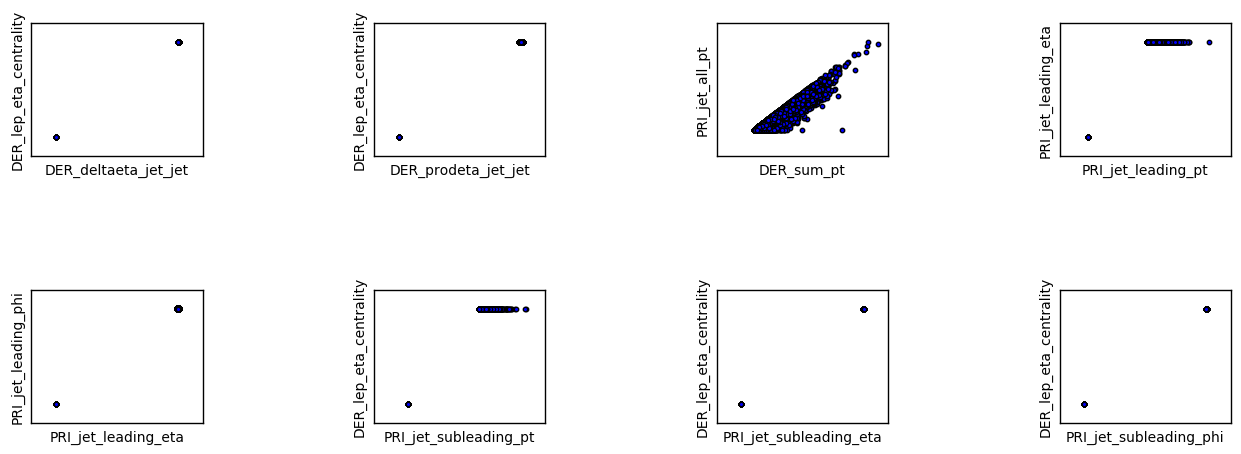

In [103]:
# plot some correlated features
subs = 0
for col1, col2, _ in corr_vals:
    subs = subs + 1
    plt.subplot(2,4,subs)
    plt.scatter(X[col1], X[col2], s=10, marker="o")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.xticks([])
    plt.yticks([])
    
plt.subplots_adjust(left=1, bottom=2, right=3, top=3, wspace=1, hspace=1)
plt.show()

In [149]:
#X['DER_prodeta_jet_jet'].value_counts
vals = pd.value_counts(X['DER_prodeta_jet_jet'].values, sort=True)
vals.iloc[0:1]
# 70% 'nan' values
vals.iloc[0] * 1.0 / len(X['DER_prodeta_jet_jet'])

0.70982800000000001

In [13]:
# SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # for classification tasks

X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)

In [14]:
# get names of the k most important features by looking at the first value of the X_new columns
feature_names = [name for name in X.columns if X[name].values[0] in X_new[0]]
print feature_names

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']


Feature ranking:
1. feature 30 (0.595131)
2. feature 0 (0.050086)
3. feature 11 (0.036237)
4. feature 1 (0.028234)
5. feature 2 (0.026737)
6. feature 7 (0.022401)
7. feature 13 (0.018498)
8. feature 10 (0.017647)
9. feature 12 (0.014676)
10. feature 4 (0.012760)
11. feature 19 (0.012116)
12. feature 24 (0.011657)
13. feature 9 (0.011283)
14. feature 8 (0.010877)
15. feature 22 (0.010811)
16. feature 3 (0.010672)
17. feature 5 (0.010120)
18. feature 17 (0.009224)
19. feature 16 (0.008784)
20. feature 21 (0.008761)
21. feature 25 (0.008487)
22. feature 23 (0.008295)
23. feature 14 (0.008232)
24. feature 6 (0.007210)
25. feature 29 (0.006933)
26. feature 20 (0.006459)
27. feature 18 (0.006387)
28. feature 15 (0.006289)
29. feature 27 (0.005813)
30. feature 26 (0.004790)
31. feature 28 (0.004392)


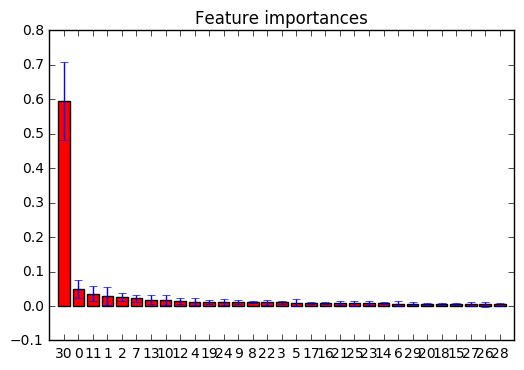

In [15]:
# plot feature importances using random trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()